In [1]:
%cd D:/Documents/Escuela/SEEL/Research_Final

D:\Documents\Escuela\SEEL\Research_Final


In [2]:
import os
import numpy as np
import random

# For the plots
import matplotlib.pyplot as plt

In [3]:
from DatasetLoader_mine import DatasetLoader

parent = 'multipletimeseriesforecasting/preprocessed-data/'

path = os.path.join(parent, 'LondonSmartMeters/London_elec_HalfHourly.csv')

dl = DatasetLoader('LondonSmartMeters', path)

matrix_1_original = dl.dataset_load_and_preprocess("original")
matrix_1_norm = dl.dataset_load_and_preprocess("normalized")
print(matrix_1_norm.shape)

---------------------------------------------------
Dataset name:  LondonSmartMeters
Dataset contains missing values?  False
--------------------------
---------------------------------------------------
Dataset name:  LondonSmartMeters
Dataset contains missing values?  False
--------------------------
(504, 9983)


In [4]:
sample_len = (matrix_1_norm.shape[0]*matrix_1_norm.shape[1]*15)/(314*365)
print("Sample_len total", sample_len)

np.random.seed(5)
sets = np.random.choice(matrix_1_norm.shape[1]-40, int(sample_len), replace=False)
sets_training, sets_testing = sets[:int(len(sets)*.8)], sets[int(len(sets)*.8):]
print(sets_training, sets_testing)

Sample_len total 658.5069365674898
[4602 7660 6870 6225 8441  580 4213 1803 7946 7446 2879 6712 4096 8580
 1330  425 3633  101 7735 2605 3463 6007 2019 5157 3785 4322 4384 4815
 5473 6986 8971   69 1772 1458 9253 3196 9223 4331 3455 8959 7196 9757
 9396 3747 2512 6503 3950 4945 7692  919 7249 7314 5593  942 9002 8895
 4060 8093 1843 6358 3842 8604 9372  881 1914 2122  442 5723  746 2150
 8842 1790 9482 7032 5176 7299 9238 1499 9890 6340 6421 3366 7020 6386
  577 8110  313 3097 7596  295  608 1897 3013 9704 9800 8591 4932 6533
 7064 1952 2308 2210 9642 2412 2895 5034 2621 1990 8333 2355 4226 1160
 7237 9345 5317 8238 8741 1222 4644 6447 2648 6375 1091 7501 1581 6929
 5981 3750 7468 8882  157 2016  826 1410 9753 8045 6047 6732 8832 8376
 3514 5365 2565  966 3679 5855 8773 5378 8666 9786 4557 3645  177 1422
 5302 4167 1404 9031 4865 8036 2054 8400 5368 6091 2612 8540 7624 4421
 6334 5505  601 6695 7285 4063 2590 3009 7689 2330 4929 1500  309  227
 3428 9634  761 7793  169 9586 2192 1101 2

### Model HD

In [5]:
from RegHD import Return_Model as Return_Model_HD, Train_Model as Train_HD, Test_Model as Test_HD

model_hd = Return_Model_HD()
model_hd, train_arr = Train_HD(model_hd, matrix_1_norm, sets_training)
model_hd, dif_hd = Test_HD(model_hd, matrix_1_norm, sets_testing)

 10%|█         | 1/10 [07:54<1:11:12, 474.67s/it]

Training mean squared error of 0.006


 20%|██        | 2/10 [15:59<1:04:04, 480.56s/it]

Training mean squared error of 0.006


 30%|███       | 3/10 [23:58<56:00, 480.13s/it]  

Training mean squared error of 0.006


 40%|████      | 4/10 [32:34<49:25, 494.19s/it]

Training mean squared error of 0.006


 50%|█████     | 5/10 [39:34<38:57, 467.49s/it]

Training mean squared error of 0.006


 60%|██████    | 6/10 [46:14<29:37, 444.48s/it]

Training mean squared error of 0.006


 70%|███████   | 7/10 [52:56<21:31, 430.63s/it]

Training mean squared error of 0.005


 80%|████████  | 8/10 [59:36<14:01, 420.66s/it]

Training mean squared error of 0.005


 90%|█████████ | 9/10 [1:06:17<06:54, 414.50s/it]

Training mean squared error of 0.005


100%|██████████| 10/10 [1:12:56<00:00, 437.64s/it]


Training mean squared error of 0.005


100%|██████████| 132/132 [00:58<00:00,  2.27it/s]

Testing mean squared error of testing 0.007


### Model DNN

In [6]:
from DNN import Return_Model as Return_Model_DNN, Train_Model as Train_DNN, Test_Model as Test_DNN

model_dnn = Return_Model_DNN()
model_dnn, train_arr = Train_DNN(model_dnn, matrix_1_norm, sets_training, retraining=True, dataset=5)
model_dnn, dif_dnn = Test_DNN(model_dnn, matrix_1_norm, sets_testing)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 40)]      0           []                               
                                                                                                  
 permute (Permute)              (None, 40, 1)        0           ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 40, 128)      1152        ['permute[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 40, 128)     512         ['conv1d[0][0]']                 
 alization)                                                                                   

  0%|          | 0/132 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 1/132 [00:48<1:46:00, 48.56s/it]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 2/132 [01:14<1:16:49, 35.45s/it]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 3/132 [01:40<1:06:54, 31.12s/it]

1/1 [==============================] - 0s 40ms/step


  3%|▎         | 4/132 [02:05<1:01:12, 28.69s/it]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 5/132 [02:31<58:43, 27.74s/it]  

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 6/132 [02:58<57:15, 27.26s/it]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 7/132 [03:24<55:55, 26.84s/it]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 8/132 [03:50<54:53, 26.56s/it]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 9/132 [04:16<54:22, 26.52s/it]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 10/132 [04:42<53:28, 26.30s/it]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 11/132 [05:07<52:13, 25.90s/it]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 12/132 [05:32<51:17, 25.65s/it]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 13/132 [05:57<50:30, 25.47s/it]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 14/132 [06:23<50:17, 25.57s/it]

1/1 [==============================] - 0s 19ms/step


 11%|█▏        | 15/132 [06:49<49:58, 25.63s/it]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 16/132 [07:15<49:50, 25.78s/it]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 17/132 [07:41<49:37, 25.89s/it]

1/1 [==============================] - 0s 19ms/step


 14%|█▎        | 18/132 [08:06<48:46, 25.67s/it]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 19/132 [08:31<47:51, 25.41s/it]

1/1 [==============================] - 0s 20ms/step


 15%|█▌        | 20/132 [08:57<47:58, 25.70s/it]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 21/132 [09:22<47:18, 25.57s/it]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 22/132 [09:47<46:26, 25.33s/it]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 23/132 [10:13<46:28, 25.58s/it]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 24/132 [10:39<45:53, 25.49s/it]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 25/132 [11:03<45:07, 25.30s/it]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 26/132 [11:29<44:55, 25.43s/it]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 27/132 [11:56<44:58, 25.70s/it]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 28/132 [12:22<44:42, 25.79s/it]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 29/132 [12:48<44:23, 25.86s/it]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 30/132 [13:14<44:00, 25.89s/it]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 31/132 [13:39<43:24, 25.79s/it]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 32/132 [14:05<43:03, 25.83s/it]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 33/132 [14:31<42:37, 25.84s/it]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 34/132 [14:57<42:06, 25.78s/it]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 35/132 [15:24<42:18, 26.17s/it]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 36/132 [15:50<41:56, 26.21s/it]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 37/132 [16:16<41:14, 26.05s/it]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 38/132 [16:41<40:43, 26.00s/it]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 39/132 [17:07<40:17, 26.00s/it]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 40/132 [17:34<40:02, 26.11s/it]

1/1 [==============================] - 0s 20ms/step


 31%|███       | 41/132 [18:00<39:46, 26.23s/it]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 42/132 [18:27<39:21, 26.24s/it]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 43/132 [18:52<38:21, 25.85s/it]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 44/132 [19:17<37:34, 25.62s/it]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 45/132 [19:43<37:16, 25.70s/it]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 46/132 [20:08<36:52, 25.73s/it]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 47/132 [20:34<36:14, 25.58s/it]

1/1 [==============================] - 0s 19ms/step


 36%|███▋      | 48/132 [20:59<35:37, 25.45s/it]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 49/132 [21:24<35:10, 25.43s/it]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 50/132 [21:50<34:56, 25.57s/it]

1/1 [==============================] - 0s 20ms/step


 39%|███▊      | 51/132 [22:15<34:21, 25.44s/it]

1/1 [==============================] - 0s 19ms/step


 39%|███▉      | 52/132 [22:40<33:40, 25.25s/it]

1/1 [==============================] - 0s 20ms/step


 40%|████      | 53/132 [23:05<33:13, 25.24s/it]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 54/132 [23:30<32:46, 25.21s/it]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 55/132 [23:55<32:12, 25.10s/it]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 56/132 [24:20<31:47, 25.10s/it]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 57/132 [24:45<31:26, 25.15s/it]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 58/132 [25:12<31:34, 25.61s/it]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 59/132 [25:39<31:27, 25.86s/it]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 60/132 [26:05<31:09, 25.97s/it]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 61/132 [26:31<30:46, 26.00s/it]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 62/132 [26:58<30:51, 26.45s/it]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 63/132 [27:25<30:24, 26.44s/it]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 64/132 [27:50<29:27, 25.99s/it]

1/1 [==============================] - 0s 20ms/step


 49%|████▉     | 65/132 [28:15<28:44, 25.73s/it]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 66/132 [28:40<28:06, 25.55s/it]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 67/132 [29:05<27:31, 25.41s/it]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 68/132 [29:30<26:55, 25.24s/it]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 69/132 [29:55<26:28, 25.22s/it]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 70/132 [30:21<26:21, 25.50s/it]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 71/132 [30:46<25:44, 25.32s/it]

1/1 [==============================] - 0s 20ms/step


 55%|█████▍    | 72/132 [31:12<25:26, 25.43s/it]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 73/132 [31:38<25:19, 25.75s/it]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 74/132 [32:04<24:58, 25.84s/it]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 75/132 [32:30<24:22, 25.65s/it]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 76/132 [32:55<23:46, 25.48s/it]

1/1 [==============================] - 0s 20ms/step


 58%|█████▊    | 77/132 [33:20<23:12, 25.32s/it]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 78/132 [33:45<22:43, 25.25s/it]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 79/132 [34:10<22:17, 25.23s/it]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 80/132 [34:36<22:02, 25.44s/it]

1/1 [==============================] - 0s 20ms/step


 61%|██████▏   | 81/132 [35:02<21:48, 25.66s/it]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 82/132 [35:27<21:14, 25.50s/it]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 83/132 [35:52<20:42, 25.36s/it]

1/1 [==============================] - 0s 21ms/step


 64%|██████▎   | 84/132 [36:17<20:13, 25.29s/it]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 85/132 [36:42<19:45, 25.22s/it]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 86/132 [37:07<19:17, 25.17s/it]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 87/132 [37:33<18:52, 25.16s/it]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 88/132 [37:58<18:26, 25.14s/it]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 89/132 [38:23<17:59, 25.11s/it]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 90/132 [38:49<17:49, 25.46s/it]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 91/132 [39:15<17:32, 25.66s/it]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 92/132 [39:41<17:03, 25.59s/it]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 93/132 [40:06<16:33, 25.47s/it]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 94/132 [40:32<16:16, 25.70s/it]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 95/132 [40:58<15:58, 25.90s/it]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 96/132 [41:25<15:41, 26.16s/it]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 97/132 [41:52<15:18, 26.25s/it]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 98/132 [42:17<14:49, 26.16s/it]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 99/132 [42:44<14:29, 26.36s/it]

1/1 [==============================] - 0s 19ms/step


 76%|███████▌  | 100/132 [43:10<13:58, 26.21s/it]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 101/132 [43:35<13:20, 25.83s/it]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 102/132 [44:00<12:48, 25.62s/it]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 103/132 [44:27<12:28, 25.82s/it]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 104/132 [44:52<12:01, 25.75s/it]

1/1 [==============================] - 0s 20ms/step


 80%|███████▉  | 105/132 [45:18<11:34, 25.71s/it]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 106/132 [45:43<11:05, 25.58s/it]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 107/132 [46:08<10:38, 25.54s/it]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 108/132 [46:34<10:10, 25.43s/it]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 109/132 [46:59<09:42, 25.35s/it]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 110/132 [47:24<09:15, 25.25s/it]

1/1 [==============================] - 0s 20ms/step


 84%|████████▍ | 111/132 [47:49<08:49, 25.21s/it]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 112/132 [48:15<08:31, 25.55s/it]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 113/132 [48:41<08:07, 25.65s/it]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 114/132 [49:06<07:39, 25.51s/it]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 115/132 [49:32<07:13, 25.50s/it]

1/1 [==============================] - 0s 19ms/step


 88%|████████▊ | 116/132 [49:57<06:45, 25.33s/it]

1/1 [==============================] - 0s 21ms/step


 89%|████████▊ | 117/132 [50:27<06:42, 26.81s/it]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 118/132 [51:00<06:39, 28.54s/it]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 119/132 [51:33<06:30, 30.00s/it]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 120/132 [52:02<05:55, 29.64s/it]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 121/132 [52:30<05:21, 29.27s/it]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 122/132 [52:56<04:42, 28.25s/it]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 123/132 [53:24<04:12, 28.04s/it]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 124/132 [53:50<03:41, 27.63s/it]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 125/132 [54:16<03:10, 27.18s/it]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▌| 126/132 [54:42<02:40, 26.83s/it]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 127/132 [55:09<02:13, 26.72s/it]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 128/132 [55:35<01:45, 26.48s/it]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 129/132 [56:02<01:19, 26.64s/it]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 130/132 [56:29<00:53, 26.68s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 131/132 [56:54<00:26, 26.41s/it]

1/1 [==============================] - 0s 20ms/step


100%|██████████| 132/132 [57:20<00:00, 26.06s/it]


Testing mean squared error of 0.006


### Model VAE

In [7]:
from VAE import Return_Model as Return_Model_VAE, Train_Model as Train_VAE, Test_Model as Test_VAE

vae, enc, dec, es = Return_Model_VAE()
vae, enc, dec, es = Train_VAE(vae, es, matrix_1_original, sets_training, retraining=False, dataset = 5)
model_vae, dif_vae = Test_VAE(vae, matrix_1_original, sets_testing)

d:\Aplicaciones\Anaconda\envs\tensorflow_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


504
9983
504
9983
(265104, 41, 1) (265104, 41, 1)
(265104, 41, 1) (265104, 41, 1)
Epoch 1/10
8285/8285 [==============================] - 98s 11ms/step - loss: 21.5253
Epoch 2/10
8285/8285 [==============================] - 87s 10ms/step - loss: 17.1833
Epoch 3/10
8285/8285 [==============================] - 87s 10ms/step - loss: 16.8786
Epoch 4/10
8285/8285 [==============================] - 87s 10ms/step - loss: 16.9782
Epoch 5/10
8285/8285 [==============================] - 87s 10ms/step - loss: 17.3503
Epoch 6/10
8285/8285 [==============================] - 87s 11ms/step - loss: 16.8265
Epoch 7/10
8285/8285 [==============================] - 87s 10ms/step - loss: 16.2185
Epoch 8/10
8285/8285 [==============================] - 86s 10ms/step - loss: 16.0921
Epoch 9/10
8285/8285 [==============================] - 87s 11ms/step - loss: 16.0645
Epoch 10/10
8285/8285 [==============================] - 86s 10ms/step - loss: 15.7516
504
9983
504
9983
(66528, 41, 1) (66528, 41, 1)
(66528, 4

[0.04017737, 0.12993377882888876, 0.05611864810468122]
[0.06534901, 0.21248371322990475, 0.06459752004884235]


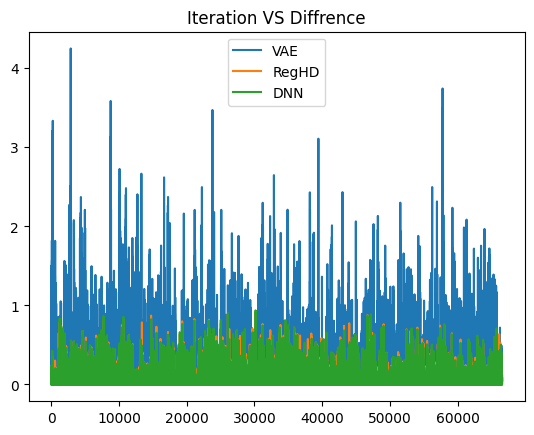

In [11]:
y = list(range(0,len(dif_dnn)))
dnn = [num[0][0] for num in dif_dnn]
vae = [num[0] for num in dif_vae]
reghd = [num.item() for num in dif_hd]

mean = [np.mean(dnn)] + [np.mean(vae)] + [np.mean(reghd)]
std = [np.std(dnn)] + [np.std(vae)] + [np.std(reghd)]
print(mean)
print(std)

#for i in range(len(vae)):
 #   if vae[i] > 0.7:
  #      vae[i] = 0.7


plt.title("Iteration VS Diffrence")
plt.plot(y, vae, "-")
plt.plot(y, reghd, "-")
plt.plot(y, dnn, "-")
plt.legend(["VAE", 'RegHD', "DNN"])
#plt.xlim(0,200)
plt.show()